In [1]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split
from google.colab import files
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q '/content/drive/My Drive/bases/diseases.zip' -d /content/texts

In [4]:
!ls

drive  sample_data  texts


In [9]:
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read().replace('\n', ' ')
  return text

className = ["Аппендицит", "Гастрит", "Гепатит", "Дуоденит", "Колит", "Панкреатит", 'Холицестит', 'Эзофагит', 'Энтерит', 'Язва']
nClasses = len(className)

trainText = []
testText = []
import re
regex = re.compile('W+')

for i in className:
  fileName = 'texts/Болезни/' + i + '.txt'
  text = readText(fileName)
  trainText.append(regex.sub(' ', text))

base_text = trainText.copy()
for i, t in enumerate(trainText):
  testText.append(trainText[i][-len(trainText[i])*3//10:])
  trainText[i] = t[:-len(trainText[i])*3//10]

In [10]:
tokenizer = Tokenizer(num_words=500, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)

In [14]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += step
  return xSample

def createSetMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))
  xSamples = []
  ySamples = []
  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))
  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)
  return(xSamples, ySamples)

In [15]:
xLen = 50
step = 5

In [16]:
xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)

1. Embedding + LSTM сеть.
2. Embedding + Conv1D сеть.
3. Embedding + сложная сеть из Dense, LSTM и Conv1D.

Epoch 1/40
42/42 [==============================] - 2s 17ms/step - loss: 2.2277 - accuracy: 0.1746 - val_loss: 2.2870 - val_accuracy: 0.1675
Epoch 2/40
42/42 [==============================] - 0s 8ms/step - loss: 1.9839 - accuracy: 0.3473 - val_loss: 2.2617 - val_accuracy: 0.1552
Epoch 3/40
42/42 [==============================] - 0s 8ms/step - loss: 1.7537 - accuracy: 0.4027 - val_loss: 2.2307 - val_accuracy: 0.1552
Epoch 4/40
42/42 [==============================] - 0s 8ms/step - loss: 1.5544 - accuracy: 0.4866 - val_loss: 2.2351 - val_accuracy: 0.2340
Epoch 5/40
42/42 [==============================] - 0s 8ms/step - loss: 1.3265 - accuracy: 0.6126 - val_loss: 2.2069 - val_accuracy: 0.2512
Epoch 6/40
42/42 [==============================] - 0s 7ms/step - loss: 1.1502 - accuracy: 0.7013 - val_loss: 2.1025 - val_accuracy: 0.2635
Epoch 7/40
42/42 [==============================] - 0s 8ms/step - loss: 1.0393 - accuracy: 0.7366 - val_loss: 2.0213 - val_accuracy: 0.2980
Epoch 8/40
42/42 [=

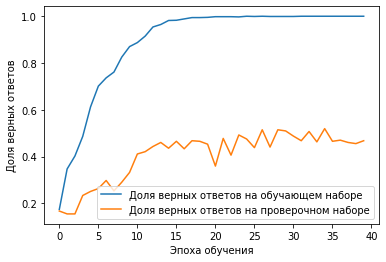

In [18]:
model = Sequential()
model.add(Embedding(500, 12, input_length=xLen))
model.add(LSTM(4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain, 
                    yTrain, 
                    epochs=40,
                    batch_size=25,
                    validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/40
40/40 [==============================] - 1s 9ms/step - loss: 2.2122 - accuracy: 0.2054 - val_loss: 2.2025 - val_accuracy: 0.2219
Epoch 2/40
40/40 [==============================] - 0s 6ms/step - loss: 1.6609 - accuracy: 0.4269 - val_loss: 2.1849 - val_accuracy: 0.1629
Epoch 3/40
40/40 [==============================] - 0s 6ms/step - loss: 1.0043 - accuracy: 0.7024 - val_loss: 2.1631 - val_accuracy: 0.1629
Epoch 4/40
40/40 [==============================] - 0s 5ms/step - loss: 0.4801 - accuracy: 0.8727 - val_loss: 2.1240 - val_accuracy: 0.1657
Epoch 5/40
40/40 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.9409 - val_loss: 2.0721 - val_accuracy: 0.2584
Epoch 6/40
40/40 [==============================] - 0s 6ms/step - loss: 0.1591 - accuracy: 0.9659 - val_loss: 1.9879 - val_accuracy: 0.2697
Epoch 7/40
40/40 [==============================] - 0s 7ms/step - loss: 0.1149 - accuracy: 0.9800 - val_loss: 1.9247 - val_accuracy: 0.3680
Epoch 8/40
40/40 [==

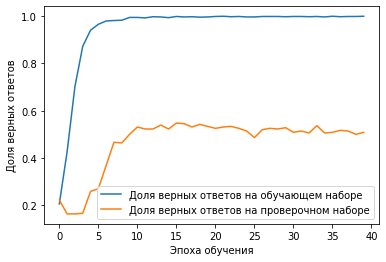

In [29]:
model = Sequential()
model.add(Embedding(500, 12, input_length=xLen))
model.add(Conv1D(20, 5, activation="relu", padding='same')) 
model.add(Conv1D(20, 5, activation="relu"))
model.add(SpatialDropout1D(0.2))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain, 
                    yTrain, 
                    epochs=40,
                    batch_size=25,
                    validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/40
42/42 [==============================] - 2s 18ms/step - loss: 2.2400 - accuracy: 0.1317 - val_loss: 2.2877 - val_accuracy: 0.1404
Epoch 2/40
42/42 [==============================] - 0s 8ms/step - loss: 1.9722 - accuracy: 0.2347 - val_loss: 2.2652 - val_accuracy: 0.1059
Epoch 3/40
42/42 [==============================] - 0s 9ms/step - loss: 1.7491 - accuracy: 0.3769 - val_loss: 2.2001 - val_accuracy: 0.1872
Epoch 4/40
42/42 [==============================] - 0s 8ms/step - loss: 1.5709 - accuracy: 0.4723 - val_loss: 2.1201 - val_accuracy: 0.2759
Epoch 5/40
42/42 [==============================] - 0s 8ms/step - loss: 1.4375 - accuracy: 0.5162 - val_loss: 2.0329 - val_accuracy: 0.3103
Epoch 6/40
42/42 [==============================] - 0s 9ms/step - loss: 1.3449 - accuracy: 0.5487 - val_loss: 1.9714 - val_accuracy: 0.3276
Epoch 7/40
42/42 [==============================] - 0s 8ms/step - loss: 1.2582 - accuracy: 0.5792 - val_loss: 1.9622 - val_accuracy: 0.3153
Epoch 8/40
42/42 [=

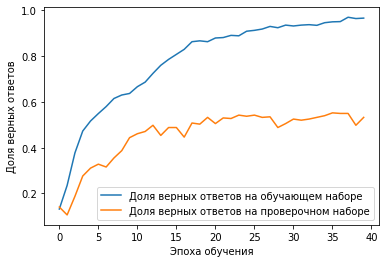

In [22]:
model = Sequential()
model.add(Embedding(500, 12, input_length=xLen))
model.add(Conv1D(20, 5, activation="relu", padding='same')) 
model.add(Conv1D(20, 5, activation="relu"))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain, 
                    yTrain, 
                    epochs=40,
                    batch_size=25,
                    validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Мне кажется, что глобально 55% для такого количества классов и такой маленькой выборки - это не так уж и плохо. Однако мы можем попробовать другие размеры xLen.

З.Ы. Но в реальное боевой задачи я бы работал над увеличением базы текстов, можно даже просто используя интернет.

In [23]:
xLen = 15
step = 5

In [24]:
xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)

Epoch 1/40
40/40 [==============================] - 2s 19ms/step - loss: 2.2469 - accuracy: 0.1904 - val_loss: 2.2908 - val_accuracy: 0.2079
Epoch 2/40
40/40 [==============================] - 0s 9ms/step - loss: 2.0330 - accuracy: 0.3156 - val_loss: 2.2745 - val_accuracy: 0.1685
Epoch 3/40
40/40 [==============================] - 0s 9ms/step - loss: 1.7364 - accuracy: 0.4289 - val_loss: 2.2629 - val_accuracy: 0.1629
Epoch 4/40
40/40 [==============================] - 0s 9ms/step - loss: 1.4921 - accuracy: 0.5591 - val_loss: 2.2722 - val_accuracy: 0.1742
Epoch 5/40
40/40 [==============================] - 0s 9ms/step - loss: 1.3289 - accuracy: 0.6253 - val_loss: 2.1951 - val_accuracy: 0.2022
Epoch 6/40
40/40 [==============================] - 0s 9ms/step - loss: 1.1834 - accuracy: 0.6703 - val_loss: 2.0877 - val_accuracy: 0.3062
Epoch 7/40
40/40 [==============================] - 0s 9ms/step - loss: 1.0938 - accuracy: 0.7084 - val_loss: 2.0061 - val_accuracy: 0.3455
Epoch 8/40
40/40 [=

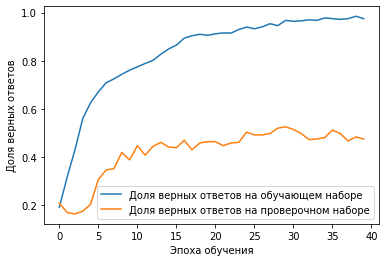

In [28]:
model = Sequential()
model.add(Embedding(500, 12, input_length=xLen))
model.add(Conv1D(20, 5, activation="relu", padding='same')) 
model.add(Conv1D(20, 5, activation="relu"))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain, 
                    yTrain, 
                    epochs=40,
                    batch_size=25,
                    validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/70
40/40 [==============================] - 2s 19ms/step - loss: 2.2730 - accuracy: 0.1353 - val_loss: 2.2861 - val_accuracy: 0.2219
Epoch 2/70
40/40 [==============================] - 0s 10ms/step - loss: 2.1134 - accuracy: 0.2725 - val_loss: 2.2696 - val_accuracy: 0.2388
Epoch 3/70
40/40 [==============================] - 0s 9ms/step - loss: 1.8076 - accuracy: 0.4088 - val_loss: 2.2693 - val_accuracy: 0.1433
Epoch 4/70
40/40 [==============================] - 0s 9ms/step - loss: 1.5151 - accuracy: 0.5060 - val_loss: 2.2277 - val_accuracy: 0.1994
Epoch 5/70
40/40 [==============================] - 0s 9ms/step - loss: 1.3342 - accuracy: 0.5661 - val_loss: 2.1184 - val_accuracy: 0.3567
Epoch 6/70
40/40 [==============================] - 0s 9ms/step - loss: 1.1895 - accuracy: 0.6202 - val_loss: 2.1050 - val_accuracy: 0.3258
Epoch 7/70
40/40 [==============================] - 0s 10ms/step - loss: 1.0694 - accuracy: 0.6874 - val_loss: 1.9498 - val_accuracy: 0.4466
Epoch 8/70
40/40 

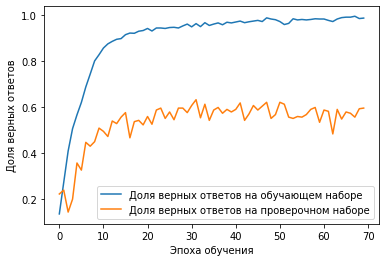

In [38]:
xLen = 75
step = 5
xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)
model = Sequential()
model.add(Embedding(500, 12, input_length=xLen))
model.add(Conv1D(20, 5, activation="relu", padding='same')) 
model.add(Conv1D(20, 5, activation="relu"))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain, 
                    yTrain, 
                    epochs=70,
                    batch_size=25,
                    validation_data=(xTest, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Ну между прочим стало немного лучше =) Но самое главное, что самостоятельный Embedding еще ни разу не показал себя хорошо. Давайте попробуем Bag of Words, хотя у нас будут сложности с разной размерностью при передаче в слои LSTM (если использовать их вместе).

In [43]:
xLen = 50
step = 5
xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())
# xTrain01 = np.expand_dims(xTrain01, axis=1)
# xTest01 = np.expand_dims(xTest01, axis=1)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 75, 12)            6000      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 75, 20)            1220      
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 71, 20)            2020      
_________________________________________________________________
spatial_dropout1d_10 (Spatia (None, 71, 20)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 4)                 400       
_________________________________________________________________
flatten_11 (Flatten)         (None, 4)                 0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 4)               

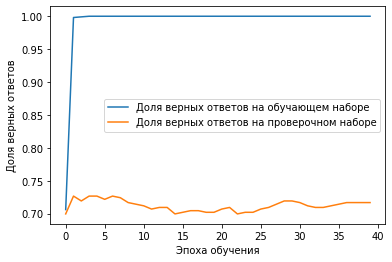

In [50]:
# сначала напишем самую прсотенькую сеть
model01 = Sequential()
model01.add(Dense(200, input_dim=500, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(10, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

history = model01.fit(xTrain01, 
                      yTrain, 
                      epochs=40,
                      batch_size=25,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [64]:
# А что если взять прошлую структуру...
xLen = 50
step = 5
xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())
xTrain01 = np.expand_dims(xTrain01, axis=2)
xTest01 = np.expand_dims(xTest01, axis=2)

In [65]:
xTest01.shape

(406, 500, 1)

Epoch 1/70
42/42 [==============================] - 3s 30ms/step - loss: 2.2107 - accuracy: 0.1975 - val_loss: 2.2401 - val_accuracy: 0.2069
Epoch 2/70
42/42 [==============================] - 1s 19ms/step - loss: 2.1130 - accuracy: 0.2366 - val_loss: 2.2043 - val_accuracy: 0.2069
Epoch 3/70
42/42 [==============================] - 1s 20ms/step - loss: 2.0684 - accuracy: 0.2567 - val_loss: 2.2024 - val_accuracy: 0.1823
Epoch 4/70
42/42 [==============================] - 1s 20ms/step - loss: 2.0418 - accuracy: 0.2653 - val_loss: 2.2050 - val_accuracy: 0.1773
Epoch 5/70
42/42 [==============================] - 1s 20ms/step - loss: 2.0270 - accuracy: 0.2653 - val_loss: 2.2010 - val_accuracy: 0.1552
Epoch 6/70
42/42 [==============================] - 1s 20ms/step - loss: 1.9662 - accuracy: 0.2939 - val_loss: 2.1958 - val_accuracy: 0.1552
Epoch 7/70
42/42 [==============================] - 1s 19ms/step - loss: 1.8391 - accuracy: 0.3426 - val_loss: 2.1689 - val_accuracy: 0.1749
Epoch 8/70
42

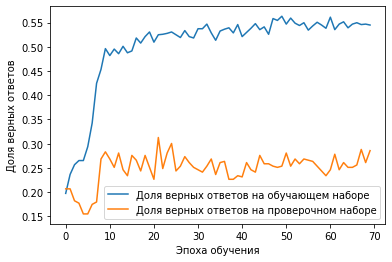

In [69]:
model = Sequential()
# model.add(Dense(200, input_dim=500, activation="relu"))
# model.add(Dropout(0.25))
model.add(LSTM(4))
model.add(Flatten())
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(xTrain01, 
                    yTrain, 
                    epochs=70,
                    batch_size=25,
                    validation_data=(xTest01, yTest))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Ладно, последний франкенштейн совсем не але)) Тем не менее нам удалось достигнуть 72.6% корректных ответов на 10 классов на ужасной маленькой выборке. Когда я делал это домашнее задание в прошлый раз, то результат был значительно хуже =)